In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import koreanize_matplotlib
import folium
import geopandas as gpd

roadkill1 = pd.read_csv('./data/roadkill1.csv')
ecopath = pd.read_csv('./data/ecopath.csv')
ecopath['수'] = 1
grid = gpd.read_file('./data/(B100)국토통계_건축물-건축면적-(격자) 10KM_전국_202312/')
merged_df = pd.read_csv('./data/eco_rk_merged.csv')
map_df = gpd.read_file('./data/전국지도_5179/')
map_df =  map_df.to_crs('EPSG:4326')
map_df.head(3)

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,layer,path,geometry
0,30110,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.49243 36.43937, 127.49152 36.437..."
1,30140,Jung-gu,중구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.45484 36.30162, 127.45484 36.301..."
2,30170,Seo-gu,서구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.37014 36.28918, 127.37014 36.289..."


In [61]:
df = ecopath.groupby(['시']).count()['생태통로명']
pd.DataFrame(df)

,생태통로명
시,
강원도,76
경기도,108
경상남도,40
경상북도,63
광주광역시,3
대전광역시,3
부산광역시,7
서울특별시,1
세종특별자치시,1


In [66]:
name_eco = ecopath['생태통로명'].to_list()
lat_eco = ecopath['위도'].to_list()
long_eco = ecopath['경도'].to_list()

count_rk = roadkill1['발생건수'].to_list()
lat_rk = roadkill1['위도'].to_list()
long_rk = roadkill1['경도'].to_list()

def size_select(count):
    if 3 <= count <= 4:
        return '200'
    elif 4<= count <= 8:
        return '2000'
    else:
        return '5000'

map = folium.Map(location=[37.50,127.04], zoom_start=7) #맵이 표시될 중심점(위,경도),확대 정도
for i in range(len(name_eco)):
    marker = folium.Circle([lat_eco[i], long_eco[i]], # 위도, 경도
                               popup=name_eco[i],      # 팝업
                               radius = 200) #파란 마크
    marker.add_to(map)  # 맵에다가 마커 추가
for i in range(len(count_rk)):
    marker = folium.Circle([lat_rk[i], long_rk[i]], # 위도, 경도
                               popup=count_rk[i],      # 팝업
                               radius = size_select(count_rk[i]),
                               color = 'red')
    marker.add_to(map)  # 맵에다가 마커 추가
map

In [2]:
g_eco=gpd.GeoDataFrame(ecopath, geometry=gpd.points_from_xy(ecopath.경도, ecopath.위도), crs='EPSG:4326')
g_rk=gpd.GeoDataFrame(roadkill1, geometry=gpd.points_from_xy(roadkill1.경도, roadkill1.위도), crs='EPSG:4326')

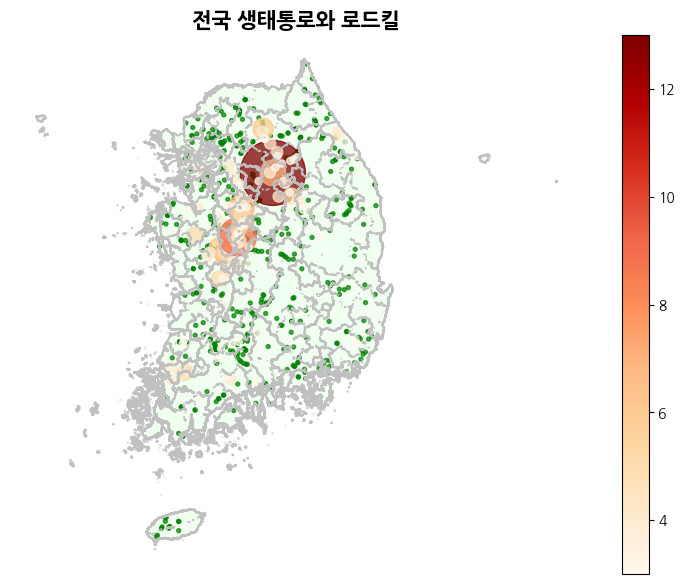

In [3]:
f,ax = plt.subplots(1,1,figsize=(10,7))

gpd.GeoSeries(map_df.unary_union).boundary.plot(ax=ax, color='silver')
map_df.plot(color='honeydew', ax=ax)
g_eco.plot(color='green', markersize=g_eco['수']*8, ax=ax, alpha=0.7)
ax.set_title("전국 생태통로와 로드킬", fontsize=15, fontweight='bold')
g_rk.plot(column = '발생건수', s=g_rk['발생건수']**3, cmap='OrRd', legend=True, ax=ax, alpha=0.75) # 분위수
ax.axis('off')

plt.show()

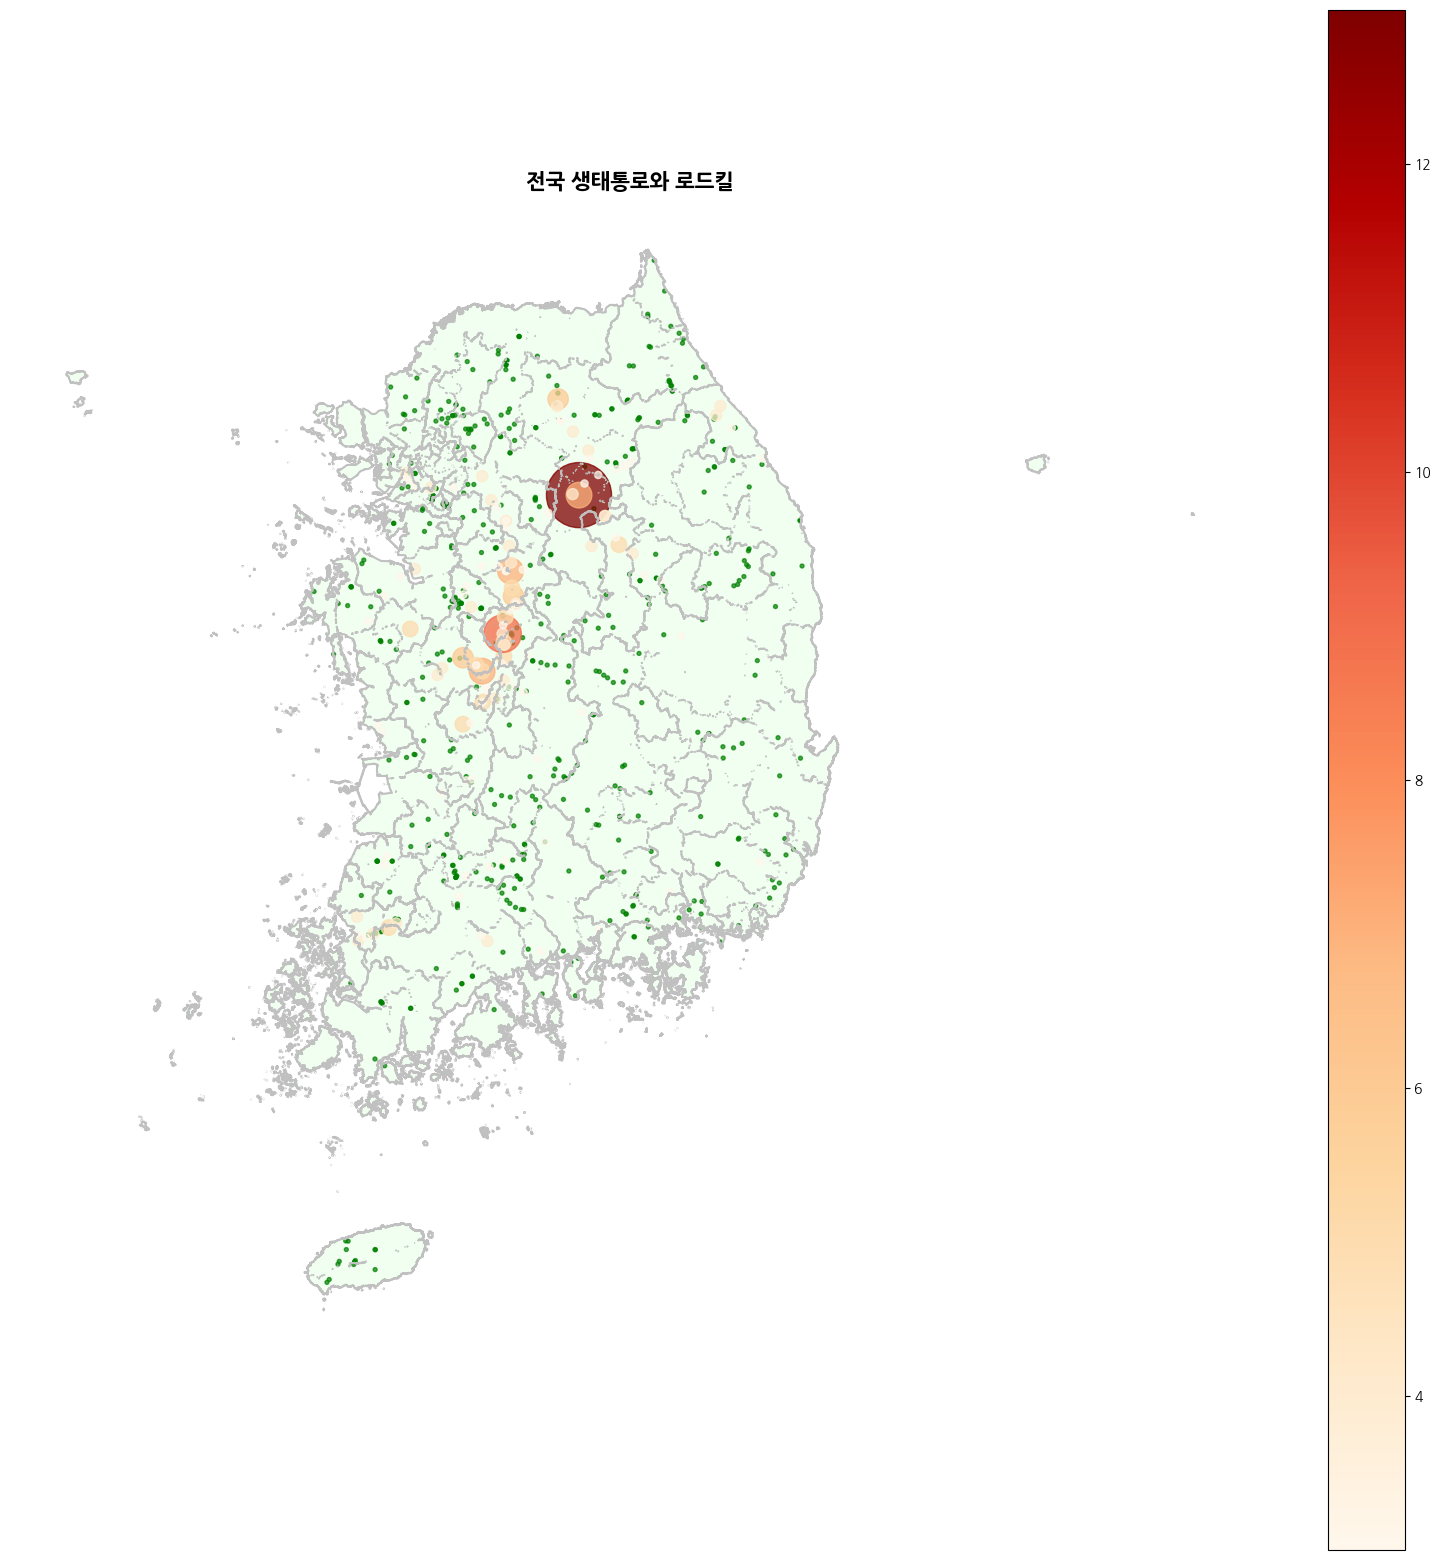

In [53]:
f,ax = plt.subplots(1,1,figsize=(20,20))

gpd.GeoSeries(map_df.unary_union).boundary.plot(ax=ax, color='silver')
map_df.plot(color='honeydew', ax=ax)
g_eco.plot(color='green', markersize=g_eco['수']*8, ax=ax, alpha=0.7)
ax.set_title("전국 생태통로와 로드킬", fontsize=15, fontweight='bold')
g_rk.plot(column = '발생건수', s=g_rk['발생건수']**3, cmap='OrRd', legend=True, ax=ax, alpha=0.75) # 분위수
ax.axis('off')

plt.show()

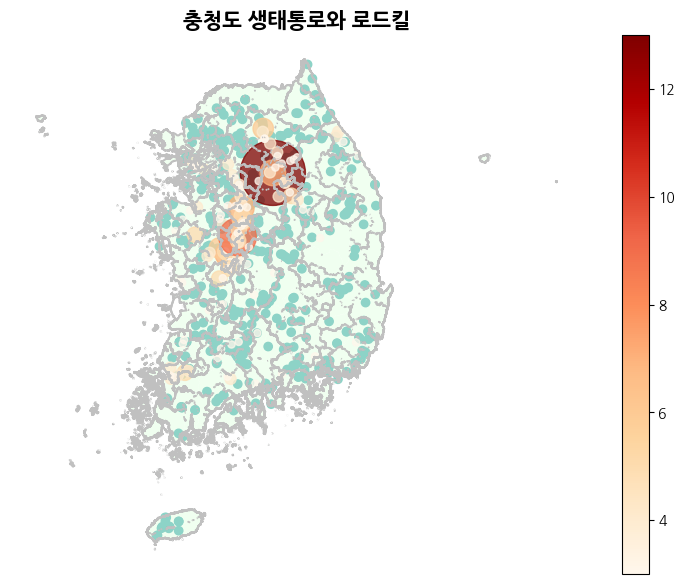

In [5]:
f,ax = plt.subplots(1,1,figsize=(10,7))

gpd.GeoSeries(map_df.unary_union).boundary.plot(ax=ax, color='silver')
map_df.plot(color='honeydew', ax=ax)
g_eco.plot(column='수', cmap='Set3', ax=ax) 
ax.set_title("충청도 생태통로와 로드킬", fontsize=15, fontweight='bold')
g_rk.plot(column = '발생건수', s=g_rk['발생건수']**3, cmap='OrRd', legend=True, ax=ax, alpha=0.75) # 분위수
ax.axis('off')

plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 4 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


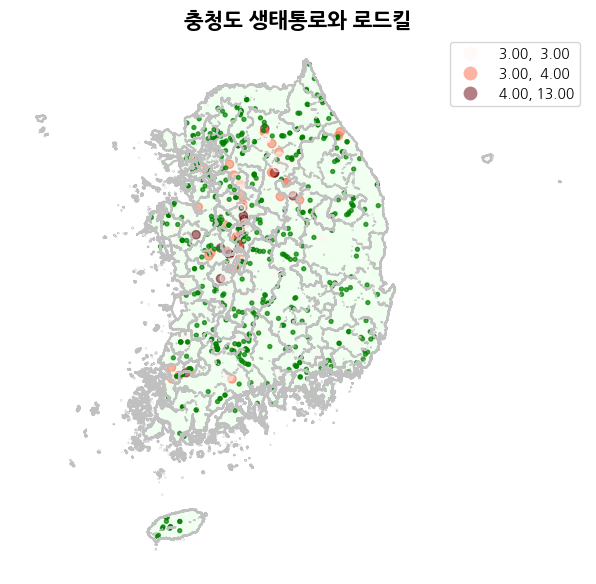

In [6]:
f,ax = plt.subplots(1,1,figsize=(10,7))

gpd.GeoSeries(map_df.unary_union).boundary.plot(ax=ax, color='silver')
map_df.plot(color='honeydew', ax=ax)
g_rk.plot(column='발생건수', scheme='Quantiles', k=4, cmap='Reds', legend=True, ax=ax, alpha=0.5) # 분위수
ax.set_title("충청도 생태통로와 로드킬", fontsize=15, fontweight='bold')
g_eco.plot(color='green', markersize=g_eco['수']*8, ax=ax, alpha=0.7)
ax.axis('off')

plt.show()

In [26]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

import libpysal as lps
import esda

from splot.esda import plot_moran, moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local

In [5]:
merged_df= gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df.경도, merged_df.위도), crs='EPSG:4326')
merged_df = merged_df.astype({ '발생건수' : 'int' })
merged_df = merged_df.astype({ '생태통로수' : 'int' })
merged_df

,위도,경도,발생건수,생태통로수,geometry
0,37.340987,127.912591,1,0,POINT (127.91259 37.34099)
1,37.340987,127.912591,1,0,POINT (127.91259 37.34099)
2,37.340987,127.912591,1,0,POINT (127.91259 37.34099)
3,37.340987,127.912591,1,0,POINT (127.91259 37.34099)
4,37.340987,127.912591,1,0,POINT (127.91259 37.34099)
...,...,...,...,...,...
984,37.786278,127.164814,0,1,POINT (127.16481 37.78628)
985,37.880278,128.514444,0,1,POINT (128.51444 37.88028)
986,36.652222,126.982500,0,1,POINT (126.98250 36.65222)
987,37.209167,129.337222,0,1,POINT (129.33722 37.20917)


In [11]:
print(merged_df.shape, map_df.shape)

(989, 5) (250, 6)


In [12]:
merge = gpd.sjoin(map_df, merged_df[['생태통로수','발생건수','geometry']],how='left',op='contains').fillna(0)
merge.head(3)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,layer,path,geometry,index_right,생태통로수,발생건수
0,30110,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.49243 36.43937, 127.49152 36.437...",458.0,1.0,0.0
0,30110,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.49243 36.43937, 127.49152 36.437...",459.0,1.0,0.0
0,30110,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.49243 36.43937, 127.49152 36.437...",223.0,0.0,1.0


In [7]:
merge_grid = gpd.sjoin(grid, merged_df[['생태통로수','발생건수','geometry']],how='left',op='contains').fillna(0)
merge_grid.head(3)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\user\AppData\Local\Temp\ipykernel_27888\1490311790.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 200 ...
Right CRS: EPSG:4326

  merge_grid = gpd.sjoin(grid, merged_df[['생태통로수','발생건수','geometry']],how='left',op='contains').fillna(0)


,gid,lbl,val,geometry,index_right,생태통로수,발생건수
0,ë§ë°28,114.43,114.43,"POLYGON ((1120000.000 1880000.000, 1120000.000...",0.0,0.0,0.0
1,ëë¤79,96.73,96.73,"POLYGON ((870000.000 1590000.000, 870000.000 1...",0.0,0.0,0.0
2,ë¤ë°78,428.60,428.60,"POLYGON ((970000.000 1880000.000, 970000.000 1...",0.0,0.0,0.0


In [13]:
merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1090 entries, 0 to 249
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   SIG_CD       1090 non-null   object  
 1   SIG_ENG_NM   1090 non-null   object  
 2   SIG_KOR_NM   1090 non-null   object  
 3   layer        1090 non-null   object  
 4   path         1090 non-null   object  
 5   geometry     1090 non-null   geometry
 6   index_right  1090 non-null   float64 
 7   생태통로수        1090 non-null   float64 
 8   발생건수         1090 non-null   float64 
dtypes: float64(3), geometry(1), object(5)
memory usage: 85.2+ KB


In [23]:
eco_sum = merge['생태통로수'].groupby([merge['SIG_KOR_NM']]).sum()
eco_final = map_df.merge(eco_sum, on='SIG_KOR_NM')
eco_final.rename(columns={'SIG_KOR_NM': 'adm'}, inplace=True)
eco_final.rename(columns={'생태통로수': 'eco_sum'}, inplace=True)
eco_final.head(3)

,SIG_CD,SIG_ENG_NM,adm,layer,path,geometry,eco_sum
0,30110,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.49243 36.43937, 127.49152 36.437...",2.0
1,27140,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((128.69604 36.01557, 128.69678 36.014...",2.0
2,26170,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((129.04264 35.14589, 129.04327 35.145...",2.0


In [22]:
rk_sum = merge['발생건수'].groupby([merge['SIG_KOR_NM']]).sum()
rk_final = map_df.merge(rk_sum, on='SIG_KOR_NM')
rk_final.rename(columns={'SIG_KOR_NM': 'adm'}, inplace=True)
rk_final.rename(columns={'발생건수': 'rk_sum'}, inplace=True)
rk_final.head(3)

,SIG_CD,SIG_ENG_NM,adm,layer,path,geometry,rk_sum
0,30110,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.49243 36.43937, 127.49152 36.437...",3.0
1,27140,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((128.69604 36.01557, 128.69678 36.014...",3.0
2,26170,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((129.04264 35.14589, 129.04327 35.145...",3.0


In [24]:
final = pd.merge(eco_final[['adm', 'geometry','eco_sum']], rk_final[['adm', 'geometry','rk_sum']], on=['adm', 'geometry'])
final.head()

,adm,geometry,eco_sum,rk_sum
0,동구,"POLYGON ((127.49243 36.43937, 127.49152 36.437...",2.0,3.0
1,동구,"POLYGON ((128.69604 36.01557, 128.69678 36.014...",2.0,3.0
2,동구,"POLYGON ((129.04264 35.14589, 129.04327 35.145...",2.0,3.0
3,동구,"MULTIPOLYGON (((129.44510 35.49126, 129.44512 ...",2.0,3.0
4,동구,"POLYGON ((126.93018 35.16115, 126.93018 35.161...",2.0,3.0


In [52]:
# 공간 유사성(Spatial similarity)
w =  lps.weights.Queen.from_dataframe(final, silence_warnings=True)
w.transform = 'r'

# 속성 유사성(Attribute similarity)
# final['weighted'] = lps.weights.lag_spatial(w, final['eco_sum'])
# eco_final.head()

C:\Users\user\AppData\Local\Temp\ipykernel_5452\1786252409.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w =  lps.weights.Queen.from_dataframe(final, silence_warnings=True)


C:\Users\user\AppData\Local\Temp\ipykernel_5452\3694966511.py:3: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  final.plot(column='rk_sum', scheme='Quantiles', k=10, cmap='GnBu', legend=True, ax=ax[0], colormap='OrRd') # 분위수
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 4.
  self.bins = quantile(y, k=k)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 6.
  self.bins = quantile(y, k=k)


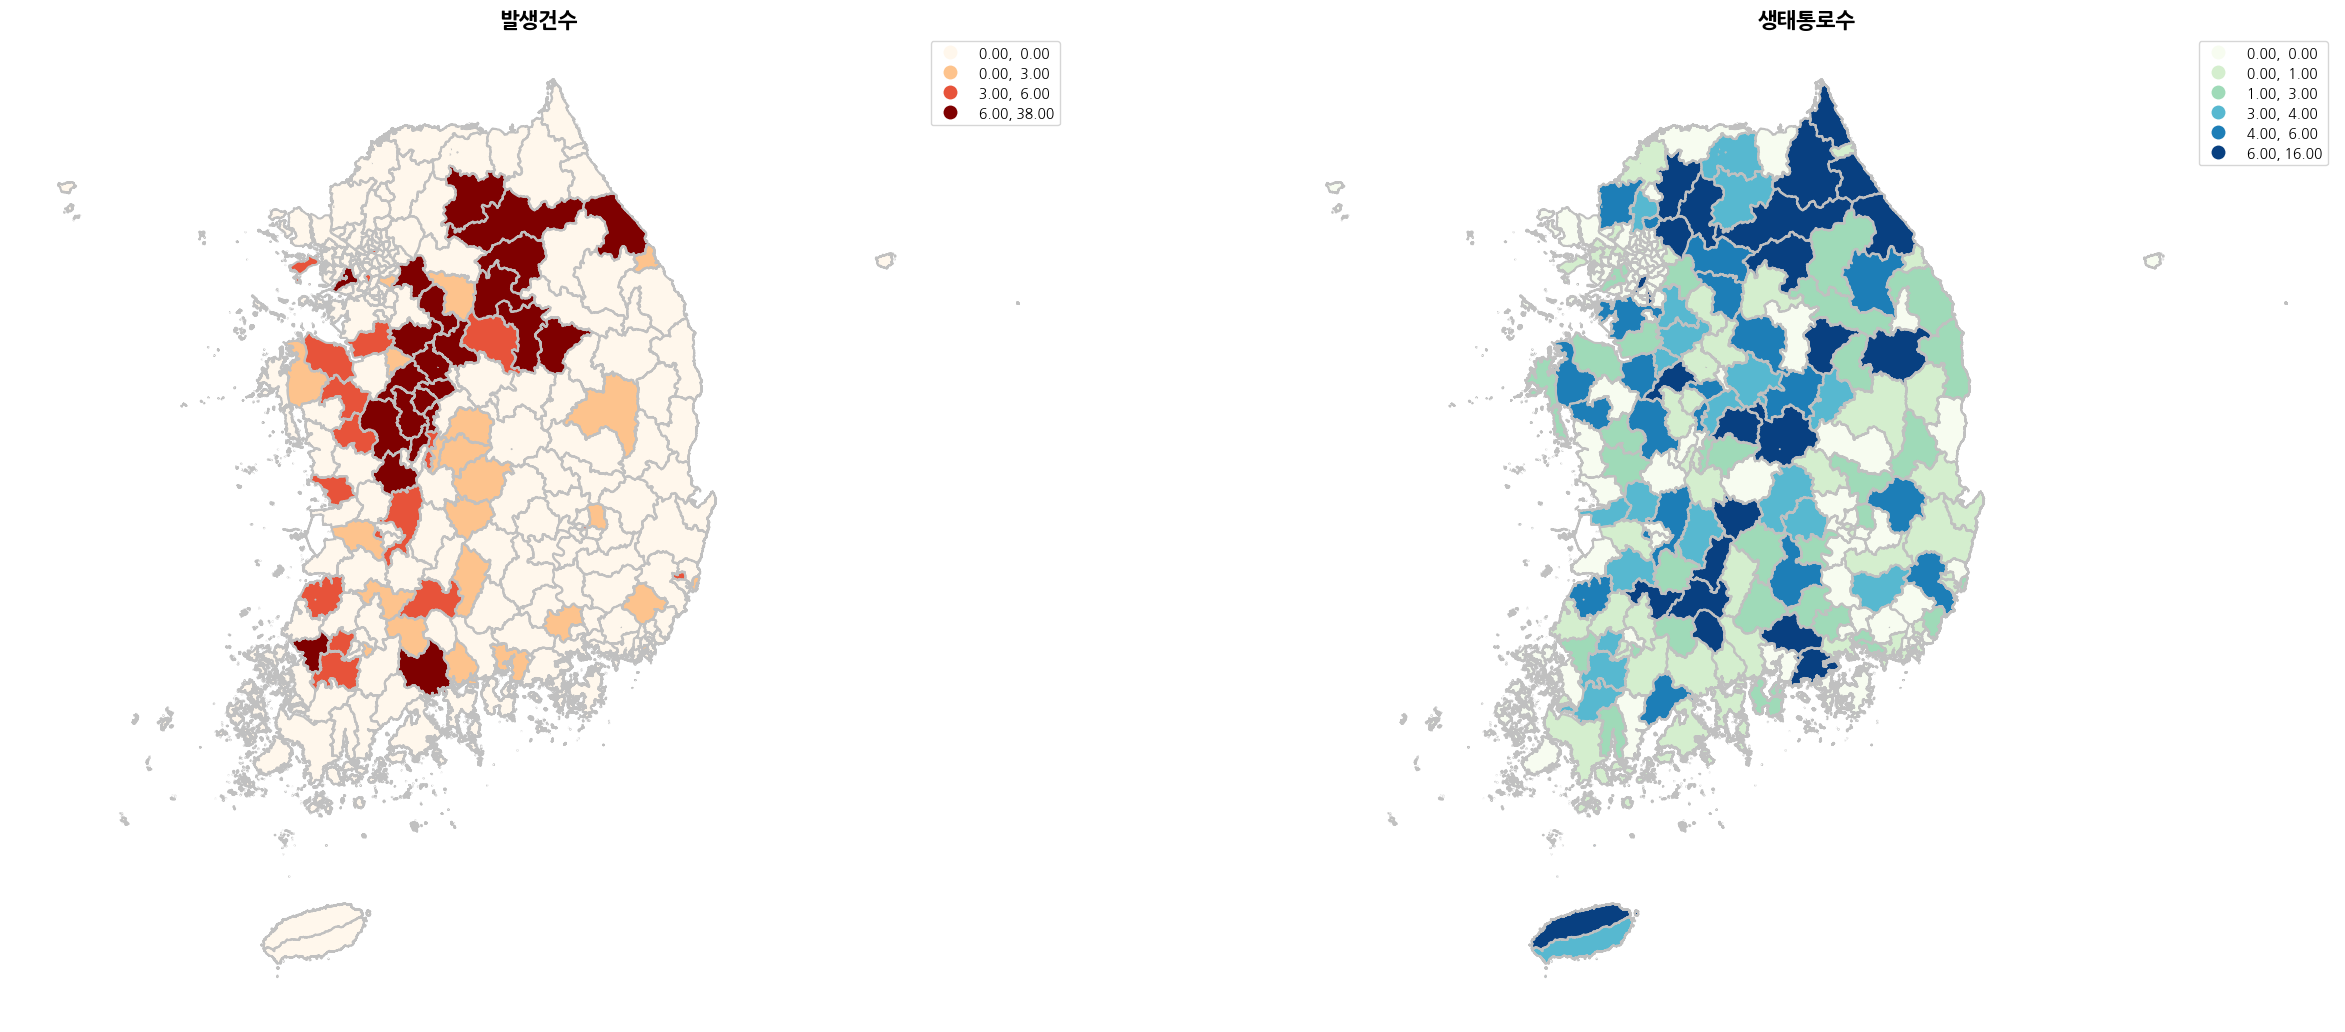

In [57]:
f,ax = plt.subplots(1,2,figsize=(30,30))

final.plot(column='rk_sum', scheme='Quantiles', k=10, cmap='GnBu', legend=True, ax=ax[0], colormap='OrRd') # 분위수
final.boundary.plot(ax=ax[0], color='silver')
ax[0].set_title("발생건수", fontsize=15, fontweight='bold')
ax[0].axis('off')

final.plot(column='eco_sum', scheme='Quantiles', k=10, cmap='GnBu', legend=True, ax=ax[1]) # 분위수
final.boundary.plot(ax=ax[1], color='silver')
ax[1].set_title("생태통로수", fontsize=15, fontweight='bold')
ax[1].axis('off')

plt.show()

In [30]:
eco_final1=eco_final[eco_final['eco_sum']>0][['adm','geometry','eco_sum']]
eco_final1.head(3)

,adm,geometry,eco_sum
0,동구,"POLYGON ((127.49243 36.43937, 127.49152 36.437...",2.0
1,동구,"POLYGON ((128.69604 36.01557, 128.69678 36.014...",2.0
2,동구,"POLYGON ((129.04264 35.14589, 129.04327 35.145...",2.0


In [48]:
# 광역적 공간 자기상관
w =  lps.weights.Queen.from_dataframe(eco_final, silence_warnings=True)
w.transform = 'r'
y = eco_final.eco_sum
moran = esda.Moran(y, w)
moran.I, moran.p_sim # Moran의 I값, p-값

C:\Users\user\AppData\Local\Temp\ipykernel_5452\4089007291.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w =  lps.weights.Queen.from_dataframe(eco_final, silence_warnings=True)


(0.2759533707513688, 0.001)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


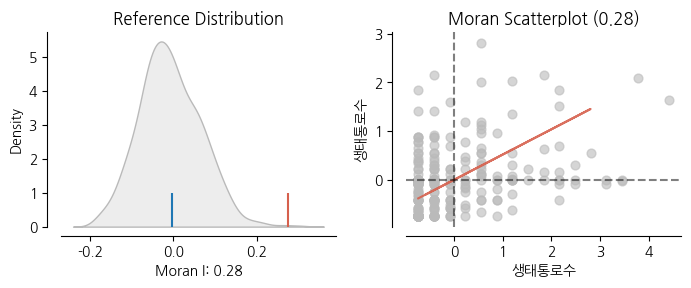

In [44]:
plot_moran(moran, zstandard=True, figsize=(7,3))

plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('생태통로수')
plt.xlabel('생태통로수')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\esda\moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\esda\moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


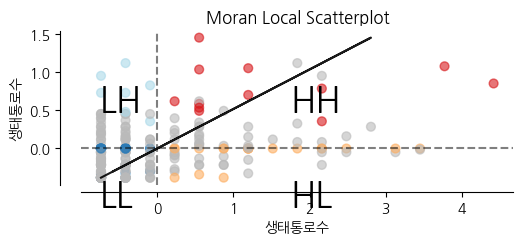

In [33]:
# 지역 공간 자기상관
moran_local = Moran_Local(y, w)

fig, ax = plt.subplots(figsize=(20,2))
moran_scatterplot(Moran_Local(y, w), p=0.05, ax=ax)
ax.set_xlabel('생태통로수')
ax.set_ylabel('생태통로수')
plt.text(1.75, 0.50, 'HH', fontsize=25)
plt.text(1.75, -0.75, 'HL', fontsize=25)
plt.text(-0.75, 0.50, 'LH', fontsize=25)
plt.text(-0.75, -0.75, 'LL', fontsize=25)
plt.show()

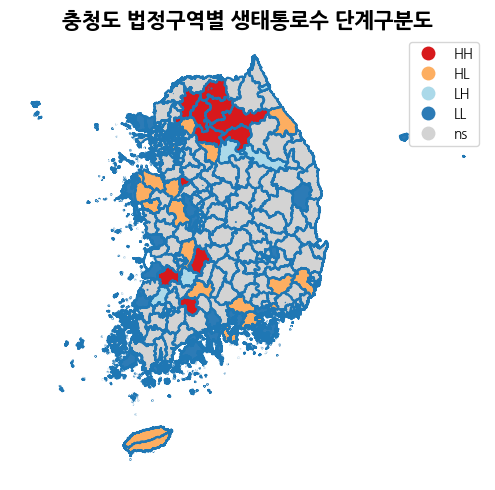

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
fig = lisa_cluster(moran_local, final, p=0.05, ax=ax)
final.boundary.plot(ax=ax)
plt.title('충청도 법정구역별 생태통로수 단계구분도', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

In [49]:
# 광역적 공간 자기상관
w =  lps.weights.Queen.from_dataframe(rk_final, silence_warnings=True)
w.transform = 'r'
y = rk_final.rk_sum
moran = esda.Moran(y, w)
moran.I, moran.p_sim # Moran의 I값, p-값

C:\Users\user\AppData\Local\Temp\ipykernel_5452\1228030024.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w =  lps.weights.Queen.from_dataframe(rk_final, silence_warnings=True)


(0.3768782825544772, 0.002)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


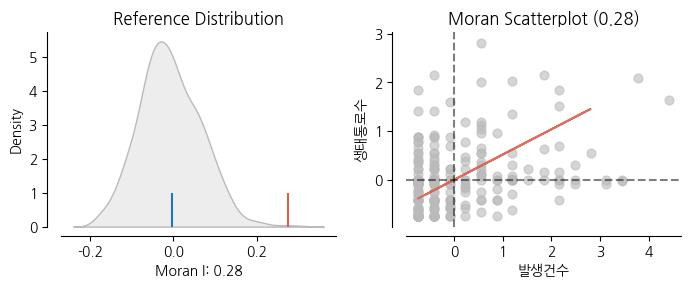

In [41]:
plot_moran(moran, zstandard=True, figsize=(7,3))

plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('생태통로수')
plt.xlabel('발생건수')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\esda\moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\esda\moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


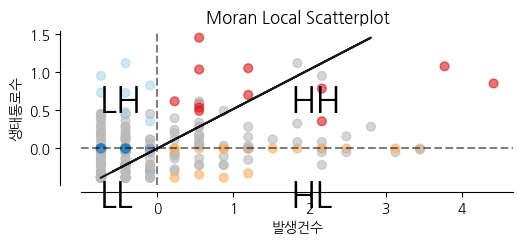

In [37]:
# 지역 공간 자기상관
moran_local = Moran_Local(y, w)

fig, ax = plt.subplots(figsize=(20,2))
moran_scatterplot(Moran_Local(y, w), p=0.05, ax=ax)
ax.set_xlabel('발생건수')
ax.set_ylabel('생태통로수')
plt.text(1.75, 0.50, 'HH', fontsize=25)
plt.text(1.75, -0.75, 'HL', fontsize=25)
plt.text(-0.75, 0.50, 'LH', fontsize=25)
plt.text(-0.75, -0.75, 'LL', fontsize=25)
plt.show()

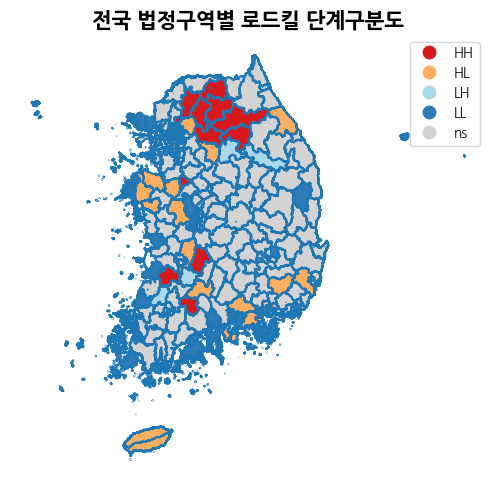

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
fig = lisa_cluster(moran_local, final, p=0.05, ax=ax)
final.boundary.plot(ax=ax)
plt.title('전국 법정구역별 로드킬 단계구분도', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

In [58]:
df=pd.read_csv('./data/동물/Felis_catus(고양이).csv')
df

,key,datasetKey,publishingOrgKey,installationKey,hostingOrganizationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,...,identificationRemarks,recordNumber,scientificNameID,http://unknown.org/taxonRankID,dynamicProperties,identificationVerificationStatus,taxonRemarks,vernacularName,taxonConceptID,http://unknown.org/species
0,4507721942,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-01-16T15:19:45.976+00:00,2024-01-16T23:39:48.740+00:00,429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4507728029,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-01-16T15:19:45.976+00:00,2024-01-16T23:39:44.227+00:00,429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4510085686,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-01-16T15:19:45.976+00:00,2024-01-16T23:39:36.806+00:00,429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4510080751,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-01-16T15:19:45.976+00:00,2024-01-16T23:40:27.905+00:00,429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4510189896,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2024-01-16T15:19:45.976+00:00,2024-01-16T23:39:56.868+00:00,429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3001517327,ef6e0754-8bf2-4854-9aa3-3a2a1a90810b,6f2da4d9-8bd9-4f4f-852b-22cde4a43a01,9afa1395-6e93-4848-a42d-bce896f5195e,657b7bf0-766b-11d9-9f77-b8a03c50a862,KR,EML,2023-01-05T09:47:13.057+00:00,2023-08-26T07:17:49.426+00:00,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,고양이,NaN,NaN
296,3001978103,ef6e0754-8bf2-4854-9aa3-3a2a1a90810b,6f2da4d9-8bd9-4f4f-852b-22cde4a43a01,9afa1395-6e93-4848-a42d-bce896f5195e,657b7bf0-766b-11d9-9f77-b8a03c50a862,KR,EML,2023-01-05T09:47:13.057+00:00,2023-08-26T07:16:15.909+00:00,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,고양이,NaN,NaN
297,3001486392,ef6e0754-8bf2-4854-9aa3-3a2a1a90810b,6f2da4d9-8bd9-4f4f-852b-22cde4a43a01,9afa1395-6e93-4848-a42d-bce896f5195e,657b7bf0-766b-11d9-9f77-b8a03c50a862,KR,EML,2023-01-05T09:47:13.057+00:00,2023-08-26T07:16:16.797+00:00,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,고양이,NaN,NaN
298,3002005297,ef6e0754-8bf2-4854-9aa3-3a2a1a90810b,6f2da4d9-8bd9-4f4f-852b-22cde4a43a01,9afa1395-6e93-4848-a42d-bce896f5195e,657b7bf0-766b-11d9-9f77-b8a03c50a862,KR,EML,2023-01-05T09:47:13.057+00:00,2023-08-26T07:16:16.060+00:00,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,고양이,NaN,NaN
